In [1]:
import json
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
results = [json.load(open(f)) for f in glob.glob('2020*/coco_val2017_rcnn_3x_q_[1-9]*.json')]

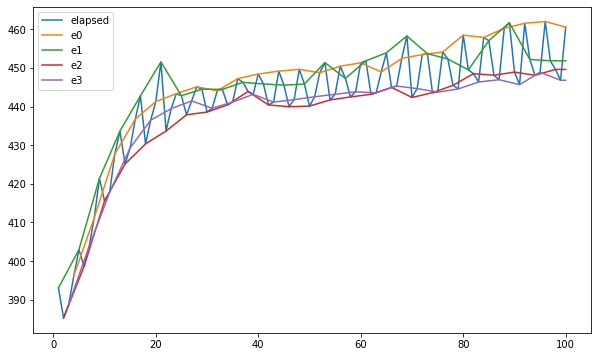

In [3]:
res = pd.Series({r['quality']: r['elapsed'] for r in results}).to_frame(name='elapsed').sort_index()
res['batch'] = res.index % 4
for b in range(4):
    res[f'e{b}'] = np.nan
    res.loc[res.batch == b, f'e{b}'] = res.elapsed
    res[f'e{b}'] = res[f'e{b}'].interpolate()
del res['batch']
res.plot();

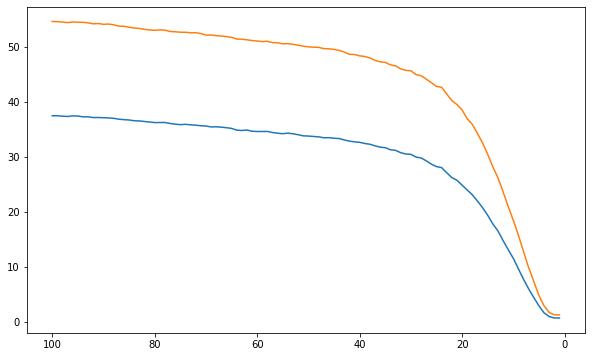

In [4]:
pd.Series({r['quality']: r['bbox']['AP'] for r in results}).sort_index().plot()
pd.Series({r['quality']: r['bbox']['AP50'] for r in results}, name='AP50').sort_index().plot()
plt.gca().invert_xaxis()

In [5]:
df = pd.Series({r['quality']: r['bbox']['AP50'] for r in results}, name='AP50').sort_index().to_frame()
df['AP'] = pd.Series({r['quality']: r['bbox']['AP'] for r in results}).sort_index()
df.index.name = 'q'
df.tail()

,AP50,AP
q,,
96,54.508723,37.442320
97,54.384174,37.328635
98,54.496822,37.387791
99,54.562688,37.459077
100,54.598016,37.466794


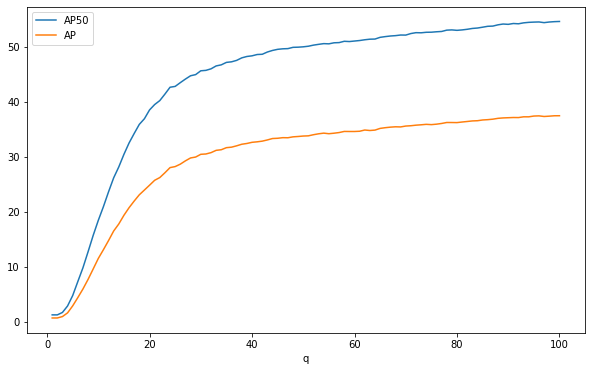

In [6]:
df.plot();